# Time Series prediction

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
raw_data = [1, 1, 2, 1, 1, 3, 3, 4, 1, 1]

In [50]:
data = pd.read_csv('data/data.csv')
data

,volume
0,3369900
1,5632100
2,4983500
3,4706700
4,6102400
5,6234800
6,7385000
7,9451300
8,8708000
9,8526900


In [33]:
data.loc[19]=1000000
data

,volume,19
0,3369900,1000000
1,5632100,1000000
2,4983500,1000000
3,4706700,1000000
4,6102400,1000000
5,6234800,1000000
6,7385000,1000000
7,9451300,1000000
8,8708000,1000000
9,8526900,1000000


In [51]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['volume'], order=(0,1,1))
res = mod.fit(disp=True)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                 volume   No. Observations:                   20
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -312.988
Date:                Sun, 18 Aug 2019   AIC                            629.976
Time:                        11:08:00   BIC                            631.865
Sample:                             0   HQIC                           630.296
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6071      0.170     -3.580      0.000      -0.939      -0.275
sigma2       1.34e+13    2.2e-15   6.09e+27      0.000    1.34e+13    1.34e+13
Ljung-Box (Q):                        4.79   Jarque-

In [52]:
v = res.get_prediction()
v.predicted_mean

0     0.000000e+00
1     1.875011e+06
2     3.557141e+06
3     4.145453e+06
4     4.369966e+06
5     5.055174e+06
6     5.519788e+06
7     6.253297e+06
8     7.510222e+06
9     7.980891e+06
10    8.195430e+06
11    7.853311e+06
12    1.178834e+07
13    9.058934e+06
14    7.349081e+06
15    6.572121e+06
16    5.711025e+06
17    5.716634e+06
18    5.363361e+06
19    4.810914e+06
dtype: float64

In [53]:
forecast = res.forecast().loc[20]
forecast

5915125.20605959

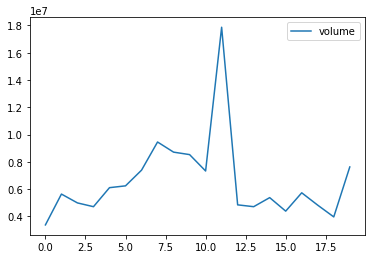

In [54]:
data.plot(y='volume')